<a href="https://colab.research.google.com/github/anushkaupadhyay/Python-Projects/blob/main/Loan_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import io

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = "darkgrid")

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()
 

Saving fraud_dataset.csv to fraud_dataset (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['fraud_dataset.csv']))
print(df)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              1             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              1             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
822       0        0           1          1              0             2872   
823       0        0           1          1              1             8596   
824       1        0           1          1              1             3664   
825       1        0           2          1              0             4921   
826       1        0           0          1              0             3847   

     CoapplicantIncome  LoanAmount  Loan_Term  Cred

# Understanding the Dataset

In [ ]:
rows, columns = df.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 827
Columns: 13


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


In [ ]:
df.isnull().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term',
       'Credit_History_Available', 'Housing', 'Locality', 'Fraud_Risk'],
      dtype='object')

# Analyzing Numerical Columns


In [ ]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,0.733978,0.481258,0.652963,0.790810,0.574365,5212.970979,1486.050786,140.892382,338.128174,0.885127,0.654172,1.978235,0.576784
std,0.442143,0.499951,0.935835,0.406976,0.494738,5593.713304,2802.847983,79.820451,75.353151,0.319062,0.475925,0.771471,0.494368
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2894.500000,0.000000,100.000000,360.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,3752.000000,0.000000,125.000000,360.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,5478.000000,2177.000000,156.500000,360.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,3.000000,1.000000


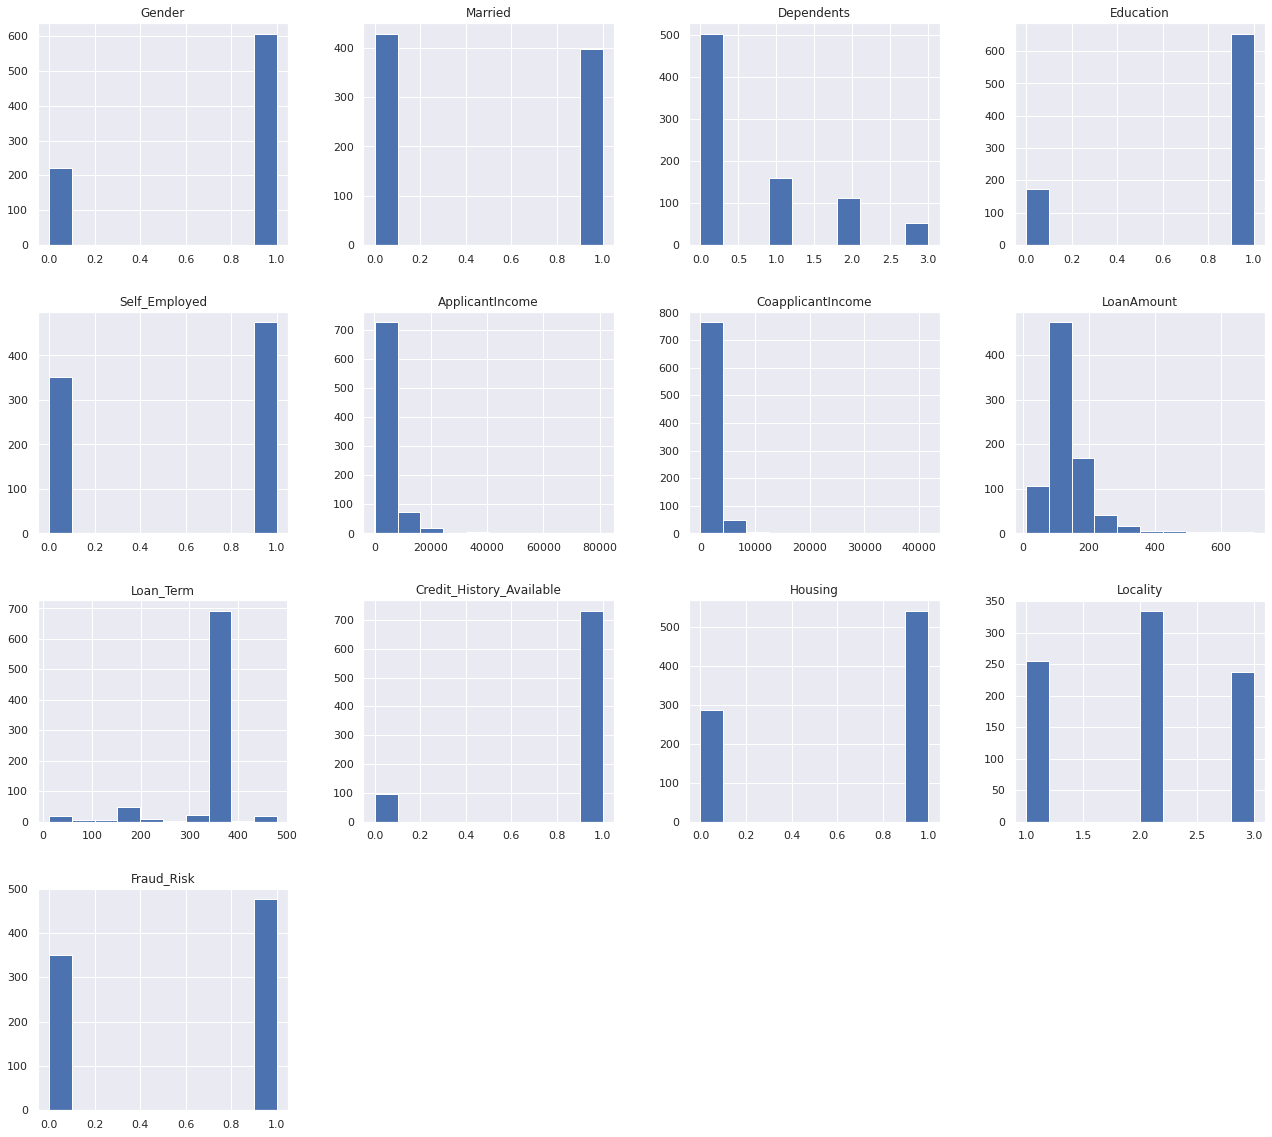

In [ ]:
df.hist( figsize = (22, 20) )
plt.show()

In [ ]:
df["Fraud_Risk"].value_counts()

1    477
0    350
Name: Fraud_Risk, dtype: int64

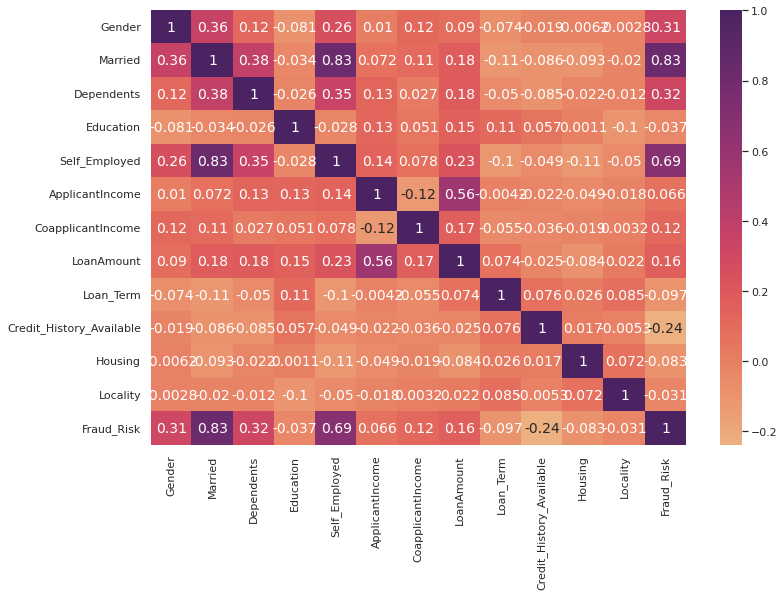

In [ ]:
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

# Analyzing Categorial Features

In [ ]:
def categorical_valcount_hist(feature):
    print(df[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=df)
    plt.show()

1    607
0    220
Name: Gender, dtype: int64


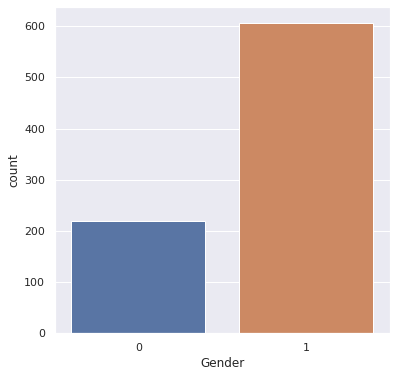

In [ ]:
categorical_valcount_hist("Gender")

0    429
1    398
Name: Married, dtype: int64


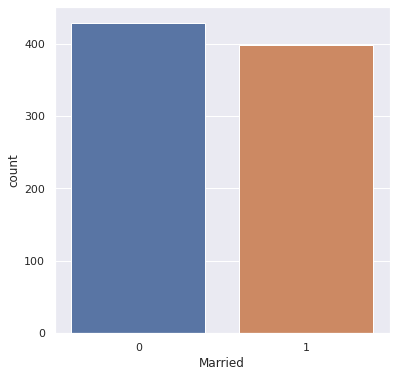

In [ ]:
categorical_valcount_hist("Married")

0    503
1    160
2    112
3     52
Name: Dependents, dtype: int64


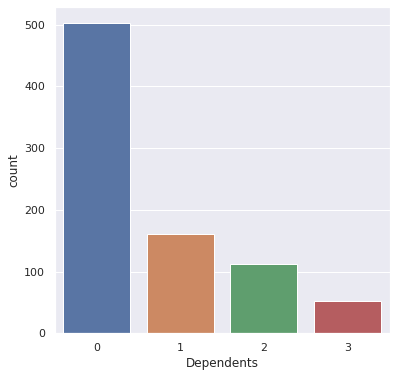

In [ ]:
categorical_valcount_hist("Dependents")

1    654
0    173
Name: Education, dtype: int64


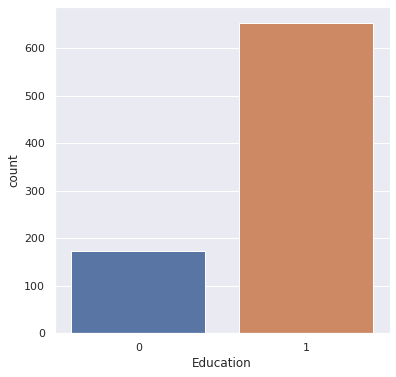

In [ ]:
categorical_valcount_hist("Education")

1    475
0    352
Name: Self_Employed, dtype: int64


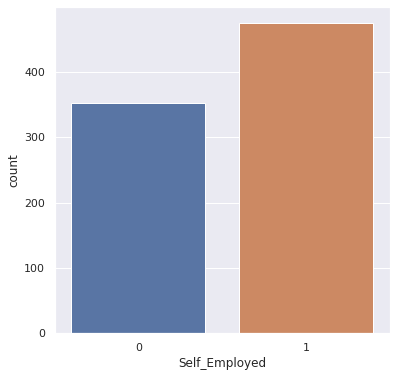

In [ ]:
categorical_valcount_hist("Self_Employed")

1    732
0     95
Name: Credit_History_Available, dtype: int64


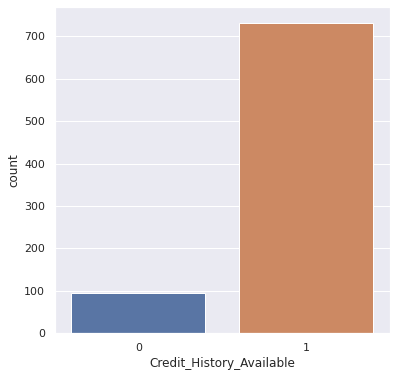

In [ ]:
categorical_valcount_hist("Credit_History_Available")

1    541
0    286
Name: Housing, dtype: int64


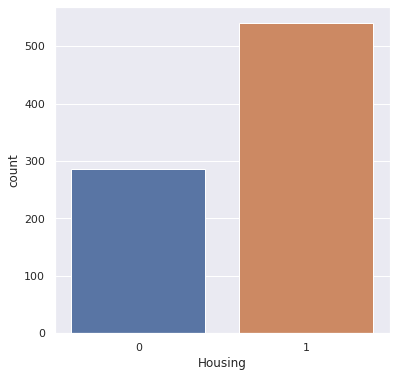

In [ ]:
categorical_valcount_hist("Housing")

2    335
1    255
3    237
Name: Locality, dtype: int64


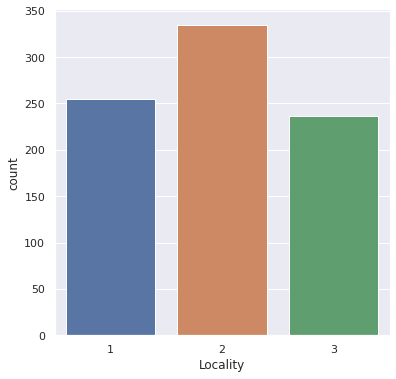

In [ ]:
categorical_valcount_hist("Locality")

1    477
0    350
Name: Fraud_Risk, dtype: int64


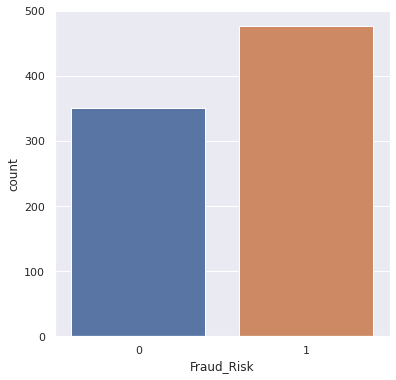

In [ ]:
categorical_valcount_hist("Fraud_Risk")

# Data Analysis

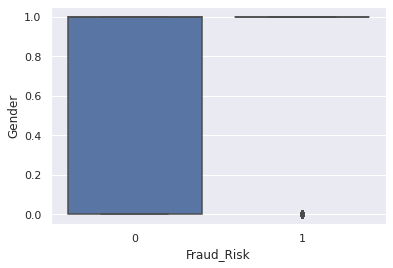

In [ ]:
sns.boxplot(x ="Fraud_Risk",y="Gender" ,data = df)

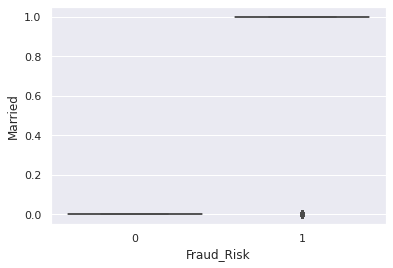

In [ ]:
sns.boxplot(x ="Fraud_Risk",y="Married" ,data = df)

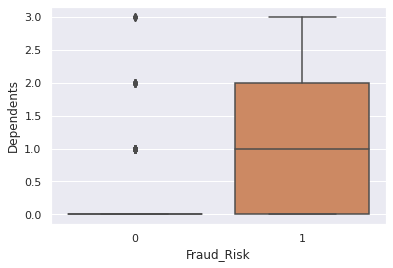

In [ ]:
sns.boxplot(x ="Fraud_Risk",y="Dependents" ,data = df)

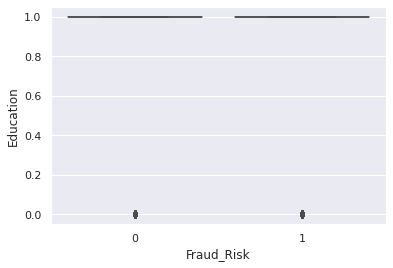

In [ ]:
sns.boxplot(x ="Fraud_Risk",y="Education" ,data = df)

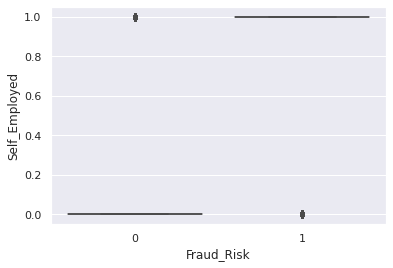

In [ ]:
sns.boxplot(x ="Fraud_Risk",y="Self_Employed" ,data = df)

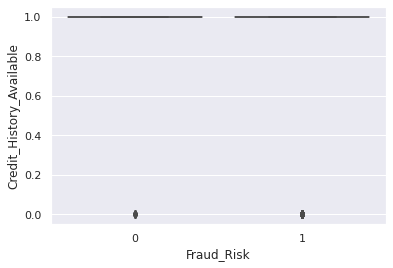

In [ ]:
sns.boxplot(x ="Fraud_Risk",y="Credit_History_Available" ,data = df)

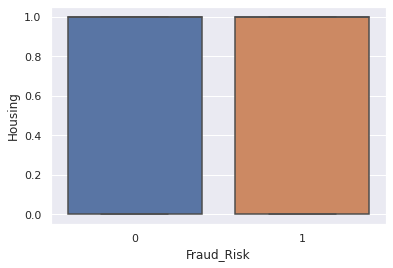

In [ ]:
sns.boxplot(x ="Fraud_Risk",y="Housing" ,data = df)

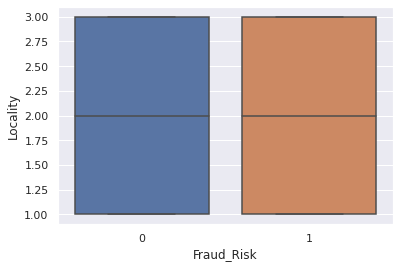

In [ ]:
sns.boxplot(x ="Fraud_Risk",y="Locality" ,data = df)

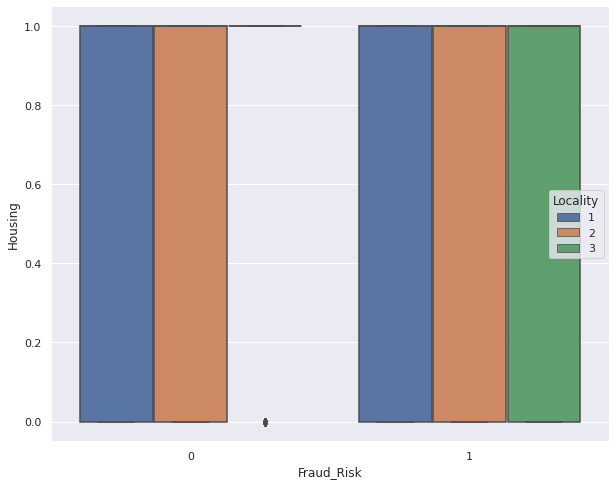

In [ ]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "Fraud_Risk", y = "Housing", hue='Locality', data = df)

# Splitting the data into train and test splits

In [ ]:
x = df.drop("Fraud_Risk", axis=1)
y = df["Fraud_Risk"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

# Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [ ]:
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state=9)
pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 88.5417
Precision: 98.8372
F1-Score: 93.4066
Accuracy score: 92.7711
AUC Score: 93.5565
